In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings ('ignore')
import os
%matplotlib inline
!pip install missingno
import missingno as msno
import plotly.express as px
from sklearn.model_selection import cross_val_score
from sklearn import metrics
from scipy import stats
from scipy.stats import norm, skew
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.feature_selection import SelectFromModel
!pip install optuna
import optuna
import xgboost as xgb
from xgboost import XGBClassifier
!pip install catboost
import catboost
from catboost import CatBoostClassifier
!pip install lightgbm
import lightgbm as lgbm
from lightgbm import LGBMClassifier
optuna.logging.set_verbosity(optuna.logging.WARNING)
from lightgbm import *
pd.set_option("display.max_columns", None)

In [2]:
data = pd.read_csv('merged_data.csv')

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11509051 entries, 0 to 11509050
Data columns (total 9 columns):
 #   Column    Dtype  
---  ------    -----  
 0   X         float64
 1   Y         float64
 2   Z         float64
 3   EDA       float64
 4   HR        float64
 5   TEMP      float64
 6   id        object 
 7   datetime  object 
 8   label     float64
dtypes: float64(7), object(2)
memory usage: 790.3+ MB


In [4]:
data.describe()

,X,Y,Z,EDA,HR,TEMP,label
count,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07,1.150905e+07
mean,-2.823775e+01,-9.091032e-01,2.382449e+01,3.502127e+00,8.576090e+01,3.223435e+01,1.554202e+00
std,3.142310e+01,3.343382e+01,2.985317e+01,5.656541e+00,1.419642e+01,2.260516e+00,7.891827e-01
min,-1.280000e+02,-1.280000e+02,-1.280000e+02,0.000000e+00,5.100000e+01,2.409000e+01,0.000000e+00
25%,-5.200000e+01,-1.900000e+01,4.000000e+00,2.242060e-01,7.672000e+01,3.019000e+01,1.000000e+00
50%,-3.300000e+01,1.000000e+00,2.500000e+01,1.157407e+00,8.390000e+01,3.257000e+01,2.000000e+00
75%,-1.400000e+01,1.700000e+01,4.900000e+01,4.077436e+00,9.310000e+01,3.425000e+01,2.000000e+00
max,1.270000e+02,1.270000e+02,1.270000e+02,5.976071e+01,1.802300e+02,3.659000e+01,2.000000e+00


In [5]:
data.head(-10)

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...,...
11509036,-30.0,-36.0,30.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.562500096,2.0
11509037,-28.0,-36.0,26.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.593750016,2.0
11509038,-39.0,-32.0,19.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.624999936,2.0
11509039,-26.0,-26.0,28.0,3.398877,88.37,33.77,F5,2020-07-23 17:28:59.656250112,2.0


In [6]:
data.dtypes

X           float64
Y           float64
Z           float64
EDA         float64
HR          float64
TEMP        float64
id           object
datetime     object
label       float64
dtype: object

In [7]:
data.isnull().sum()

X           0
Y           0
Z           0
EDA         0
HR          0
TEMP        0
id          0
datetime    0
label       0
dtype: int64

# **Exploratory Data Analysis**

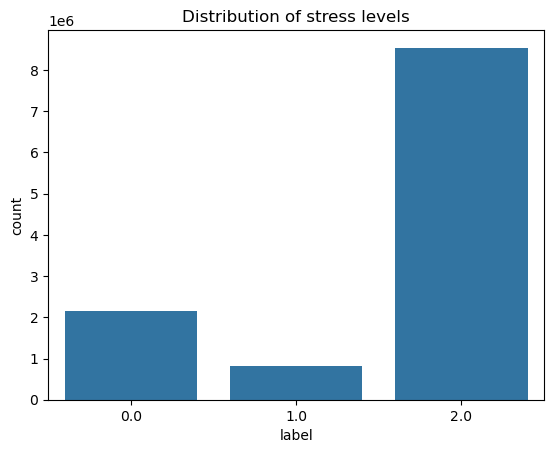

In [8]:
# Plot distribution of target variable
sns.countplot(x='label', data=data)
plt.title('Distribution of stress levels')
plt.show()

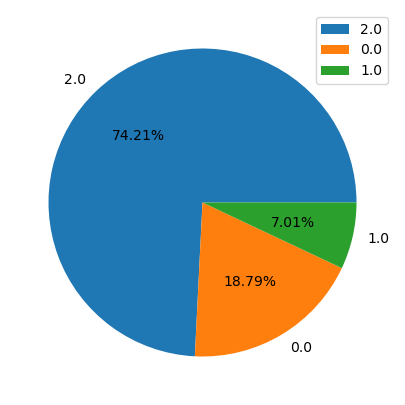

In [9]:
#Let us see how are target variable is distributed in the dataset
tdf=data['label'].value_counts().reset_index()
plt.figure(figsize=(15,5))
plt.pie(x=tdf['count'],labels=tdf['label'],autopct='%.2f%%')
plt.legend(tdf['label'])
plt.show()

In [10]:
# Group the data by ID and get the row with the maximum temperature for each group
max_temp_rows = data.loc[data.groupby("id")["TEMP"].idxmax()]

# Print the details of the row with the maximum temperature for each group
print(max_temp_rows)

             X     Y      Z        EDA      HR   TEMP  id  \
144005   -57.0   4.0  -15.0   3.075611   77.07  35.50  15   
4574030  -64.0   7.0    4.0   1.662621   83.83  36.23  83   
6057489  -66.0 -31.0  -29.0  18.849356   79.98  36.57  94   
300650     7.0 -35.0   75.0   1.811155   93.52  32.61  15   
317291   -22.0 -44.0  127.0  20.073507   85.88  36.59  5C   
1869983  -47.0  25.0   40.0   1.948249   78.42  32.71  6B   
2000610  -27.0   4.0   58.0   0.515300  108.03  34.25  6D   
3206510  -53.0 -23.0  -12.0   3.388557   93.53  36.13  7A   
4096807   -7.0  35.0   52.0   0.961276   81.85  35.87  7E   
5590236  -55.0  -9.0   11.0   2.756377   90.22  35.47  83   
5668159  -64.0 -16.0  -18.0   1.838395  101.73  35.91  8B   
6025584  -32.0 -41.0   37.0  28.700640  102.67  36.45  94   
7067948  -41.0 -35.0  -86.0  11.188519   75.22  36.43  BG   
7358546   -1.0  32.0   36.0   0.102488   77.55  31.53  CE   
8516540  -50.0   5.0   42.0   0.655017   73.98  32.21  DF   
9033252   -5.0  56.0   2

<Figure size 1000x600 with 0 Axes>

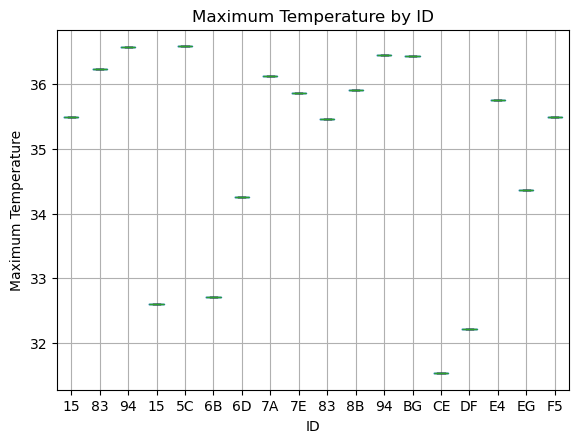

In [11]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `merged_df` is the DataFrame that contains your data

# Group the data by ID and calculate the maximum temperature for each group
max_temps = data.groupby("id")["TEMP"].max()

# Convert the maximum temperature data to a pandas DataFrame
max_temps_data = pd.DataFrame(max_temps).reset_index()

# Create a boxplot with the maximum temperature data, with the ID on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
max_temps_data.boxplot(column="TEMP", by="id")

# Set the axis labels and title
plt.xlabel("ID")
plt.ylabel("Maximum Temperature")
plt.title("Maximum Temperature by ID")
plt.suptitle("")  # Remove the default 'by group' subtitle

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

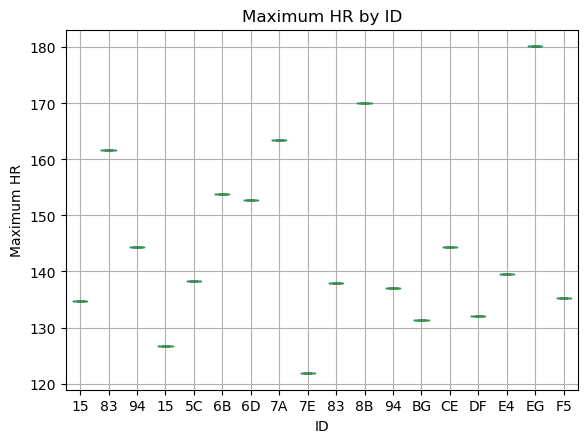

In [12]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is the DataFrame that contains your data

# Group the data by ID and calculate the maximum HR for each group
max_hr = data.groupby("id")["HR"].max()

# Convert the maximum HR data to a pandas DataFrame and reset the index
max_hr_data = pd.DataFrame(max_hr).reset_index()

# Create a boxplot with the maximum HR data, with the ID on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
max_hr_data.boxplot(column="HR", by="id")

# Set the axis labels and title
plt.xlabel("ID")
plt.ylabel("Maximum HR")
plt.title("Maximum HR by ID")
plt.suptitle("")  # Remove the default 'by group' subtitle

# Display the plot
plt.show()

<Figure size 1000x600 with 0 Axes>

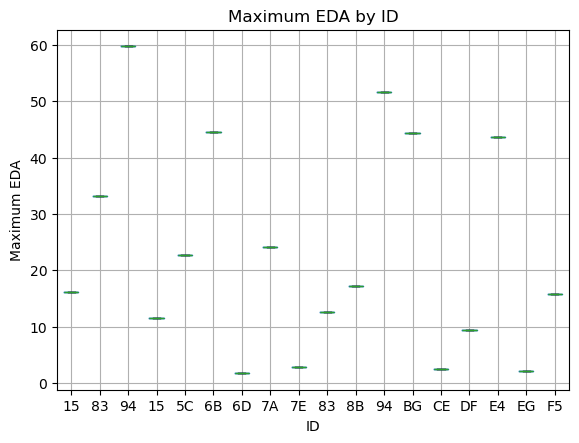

In [13]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `merged_df` is the DataFrame that contains your data

# Group the data by ID and calculate the maximum EDA for each group
max_eda = data.groupby("id")["EDA"].max()

# Convert the maximum EDA data to a pandas DataFrame and reset the index
max_eda_data = pd.DataFrame(max_eda).reset_index()

# Create a boxplot with the maximum EDA data, with the ID on the x-axis
plt.figure(figsize=(10, 6))  # Adjust the figure size for better readability
max_eda_data.boxplot(column="EDA", by="id")

# Set the axis labels and title
plt.xlabel("ID")
plt.ylabel("Maximum EDA")
plt.title("Maximum EDA by ID")
plt.suptitle("")  # Remove the default 'by group' subtitle

# Display the plot
plt.show()

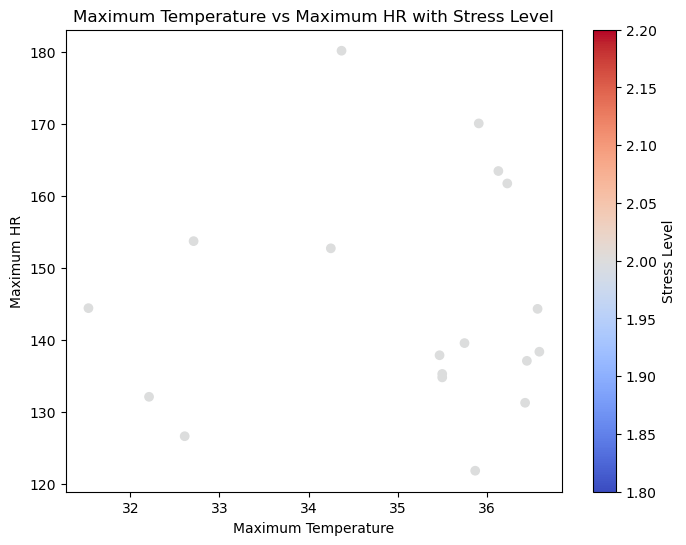

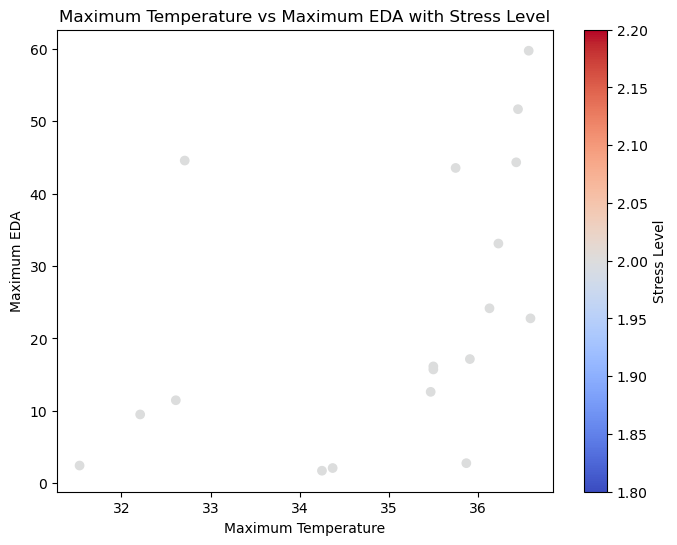

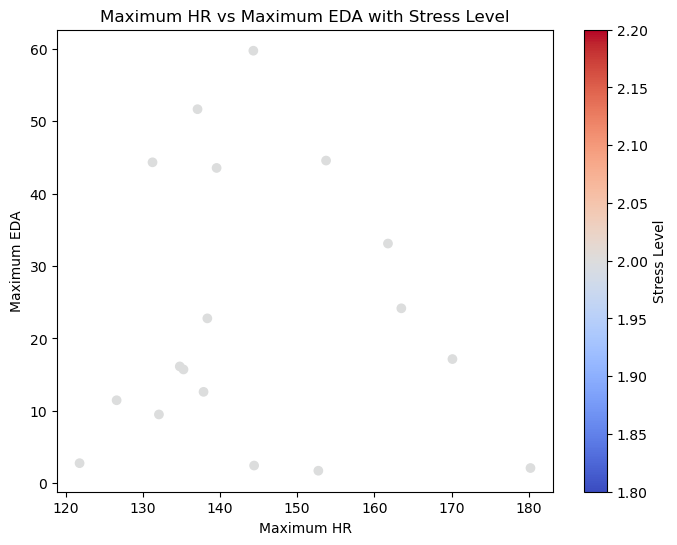

In [14]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the maximum values of temperature, HR, and EDA for each individual
max_temp_rows = data.loc[data.groupby("id")["TEMP"].idxmax()]

# Retrieve corresponding max HR and max EDA for each ID
max_hr = data.groupby("id")["HR"].max().loc[max_temp_rows["id"]].values
max_eda = data.groupby("id")["EDA"].max().loc[max_temp_rows["id"]].values
stress_levels = data.groupby("id")["label"].max().loc[max_temp_rows["id"]].values  # Stress labels

# Plot 1: Maximum Temperature vs Maximum HR
plt.figure(figsize=(8, 6))
plt.scatter(max_temp_rows["TEMP"], max_hr, c=stress_levels, cmap="coolwarm")
plt.xlabel("Maximum Temperature")
plt.ylabel("Maximum HR")
plt.title("Maximum Temperature vs Maximum HR with Stress Level")
plt.colorbar(label="Stress Level")
plt.show()

# Plot 2: Maximum Temperature vs Maximum EDA
plt.figure(figsize=(8, 6))
plt.scatter(max_temp_rows["TEMP"], max_eda, c=stress_levels, cmap="coolwarm")
plt.xlabel("Maximum Temperature")
plt.ylabel("Maximum EDA")
plt.title("Maximum Temperature vs Maximum EDA with Stress Level")
plt.colorbar(label="Stress Level")
plt.show()

# Plot 3: Maximum HR vs Maximum EDA
plt.figure(figsize=(8, 6))
plt.scatter(max_hr, max_eda, c=stress_levels, cmap="coolwarm")
plt.xlabel("Maximum HR")
plt.ylabel("Maximum EDA")
plt.title("Maximum HR vs Maximum EDA with Stress Level")
plt.colorbar(label="Stress Level")
plt.show()

##1. Maximum Temperature vs Maximum HR with Stress Level

#If points with higher stress levels (warmer colors like red) cluster at certain temperature and HR values, 
#this could suggest that high heart rates and elevated temperatures are associated with higher stress.
#Alternatively, if the stress level is spread evenly across various temperature and HR values, 
#it might indicate that no clear relationship exists between these two physiological markers and stress.


##2. Maximum Temperature vs Maximum EDA with Stress Level

#If you observe that high stress levels (e.g., red points) are concentrated at higher temperatures and higher EDA values, it could suggest that both increased temperature and electrodermal activity are correlated with stress.
If there is no distinct pattern, this might suggest that EDA and temperature may not directly correlate with stress levels in your data.

##3. Maximum HR vs Maximum EDA with Stress Level

#If you see that high stress levels (warmer colors) are associated with high HR and high EDA, it would suggest that both these physiological responses are markers of stress.
If the plot shows no clear trend or clustering of high-stress colors in one area, this might indicate that heart rate and EDA do not significantly correlate with stress in your data.

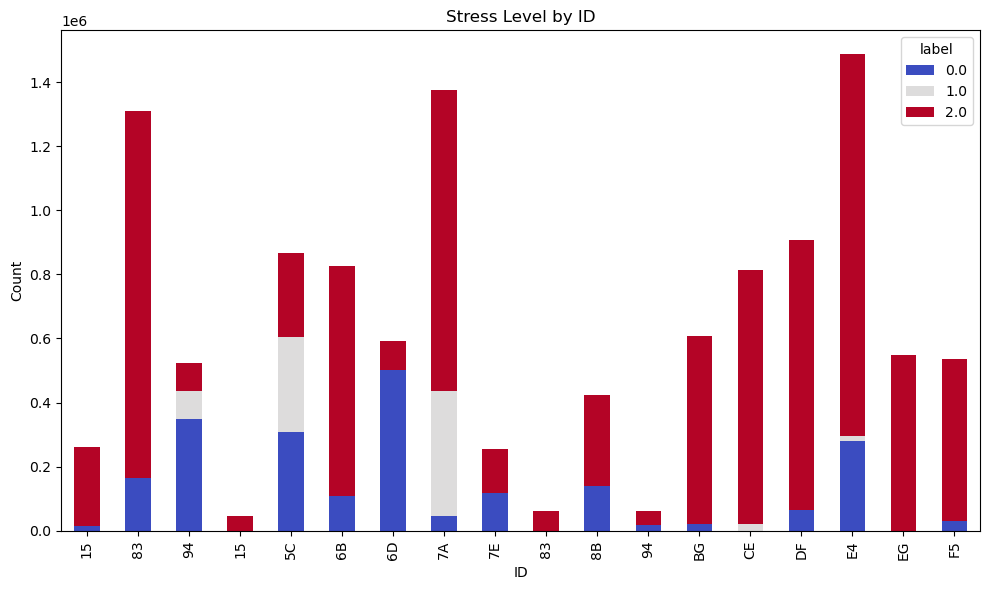

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming `data` is the DataFrame that contains your data

# Count the number of occurrences of each label for each ID
label_counts = data.groupby(['id', 'label']).size().unstack(fill_value=0)

# Create a stacked bar chart
label_counts.plot(kind='bar', stacked=True, figsize=(10, 6), colormap='coolwarm')

# Set the axis labels and title
plt.xlabel('ID')
plt.ylabel('Count')
plt.title('Stress Level by ID')

# Improve the layout and show the plot
plt.tight_layout()
plt.show()

This plot helps visualize how stress levels are distributed across individuals. For instance:

If certain individuals have predominantly higher stress levels, their bars will be dominated by the corresponding color.
If the stress levels are evenly distributed for an individual, the bar will have more evenly sized segments.
This can give insights into whether certain individuals experience more frequent high or low stress levels based on the labels.

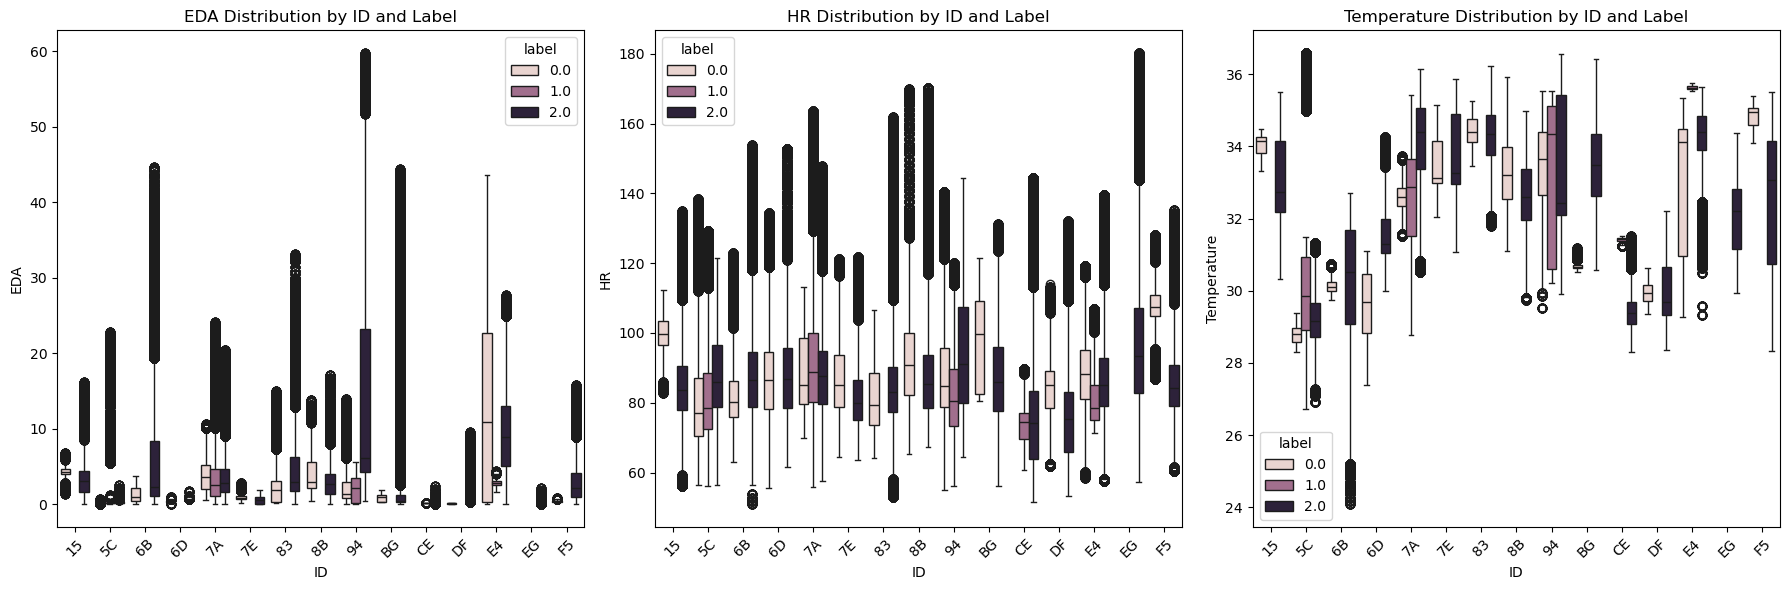

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a figure with 3 subplots arranged horizontally
fig, axs = plt.subplots(1, 3, figsize=(18, 6))

# Create a box plot of EDA, HR, and Temperature for each ID, colored by label
sns.boxplot(x="id", y="EDA", hue="label", data=data, ax=axs[0])
sns.boxplot(x="id", y="HR", hue="label", data=data, ax=axs[1])
sns.boxplot(x="id", y="TEMP", hue="label", data=data, ax=axs[2])

# Set the axis labels and titles for each subplot
axs[0].set_xlabel("ID")
axs[0].set_ylabel("EDA")
axs[0].set_title("EDA Distribution by ID and Label")

axs[1].set_xlabel("ID")
axs[1].set_ylabel("HR")
axs[1].set_title("HR Distribution by ID and Label")

axs[2].set_xlabel("ID")
axs[2].set_ylabel("Temperature")
axs[2].set_title("Temperature Distribution by ID and Label")

# Rotate x-axis labels for better readability
for ax in axs:
    ax.tick_params(axis='x', rotation=45)

# Adjust the layout of the subplots to avoid overlapping
plt.tight_layout()

# Display the plot
plt.show()

Interpretation:

EDA, HR, and Temperature Distributions: The box plots provide insight into how these physiological measurements (EDA, HR, and Temperature) vary across different IDs and stress levels.

Box Plot Elements: Each box represents the interquartile range (IQR) for each ID. The line inside the box is the median, and the whiskers extend to show the range of the data.

Hue (Label): The different colors represent different stress levels (e.g., low, medium, or high). By examining these plots, you can explore whether individuals with higher stress levels exhibit distinct patterns in their physiological responses.

In [18]:
data.head()

,X,Y,Z,EDA,HR,TEMP,id,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,15,2020-07-08 14:03:00.124999936,2.0


In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select the columns of interest
cols_of_interest = ["TEMP", "HR", "EDA", "label"]

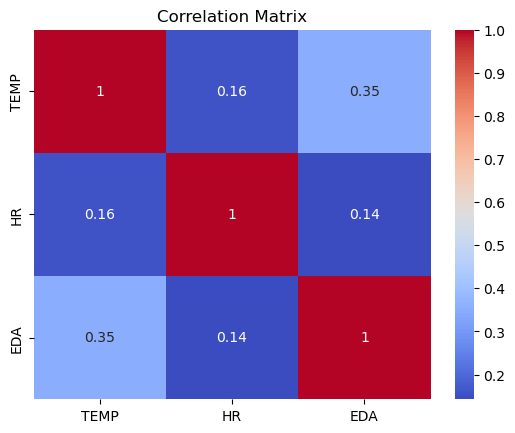

          TEMP        HR       EDA
TEMP  1.000000  0.158172  0.352888
HR    0.158172  1.000000  0.142542
EDA   0.352888  0.142542  1.000000


In [20]:
# Select only the numeric columns for correlation calculation
numeric_cols = ['TEMP', 'HR', 'EDA']  # Update these columns according to your dataset
corr_matrix = data[numeric_cols].corr()

# Plot the correlation matrix as a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

print(corr_matrix)

In [21]:
import pandas as pd

# Group data by stress level and calculate summary statistics for maximum temperature, HR, and EDA
temp_summary = data.groupby("label")["TEMP"].max().describe()
hr_summary = data.groupby("label")["HR"].max().describe()
eda_summary = data.groupby("label")["EDA"].max().describe()

# Create a dataframe with the summary statistics
summary_df = pd.DataFrame({
    "Low Stress": [temp_summary["min"], hr_summary["min"], eda_summary["min"]],
    "Medium Stress": [temp_summary["50%"], hr_summary["50%"], eda_summary["50%"]],
    "High Stress": [temp_summary["max"], hr_summary["max"], eda_summary["max"]]
}, index=["Max Temperature", "Max HR", "Max EDA"])

# Print the summary table
print(summary_df)

                 Low Stress  Medium Stress  High Stress
Max Temperature   35.910000      36.570000    36.590000
Max HR           163.500000     169.930000   180.230000
Max EDA           24.167313      43.563389    59.760712


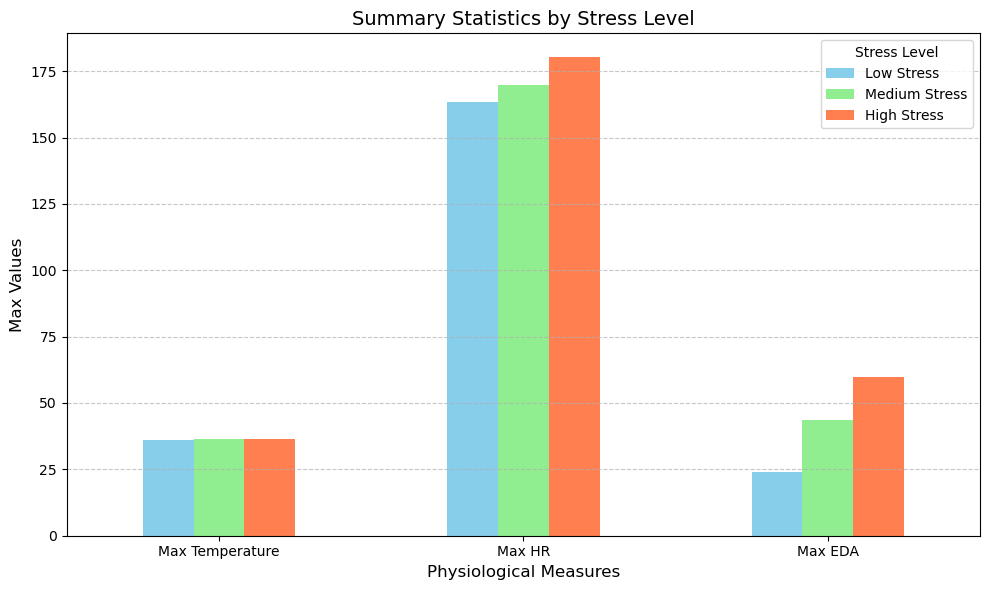

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

# Group data by stress level and calculate summary statistics for maximum temperature, HR, and EDA
temp_summary = data.groupby("label")["TEMP"].max().describe()
hr_summary = data.groupby("label")["HR"].max().describe()
eda_summary = data.groupby("label")["EDA"].max().describe()

# Create a dataframe with the summary statistics
summary_df = pd.DataFrame({
    "Low Stress": [temp_summary["min"], hr_summary["min"], eda_summary["min"]],
    "Medium Stress": [temp_summary["50%"], hr_summary["50%"], eda_summary["50%"]],  # Median
    "High Stress": [temp_summary["max"], hr_summary["max"], eda_summary["max"]]
}, index=["Max Temperature", "Max HR", "Max EDA"])

# Plot the summary table as a bar plot
ax = summary_df.plot(kind="bar", figsize=(10, 6), rot=0, color=['skyblue', 'lightgreen', 'coral'])

# Set plot attributes
ax.set_xlabel("Physiological Measures", fontsize=12)
ax.set_ylabel("Max Values", fontsize=12)
ax.set_title("Summary Statistics by Stress Level", fontsize=14)
ax.legend(title="Stress Level", fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()

Max Temperature, Max HR, and Max EDA: Each set of bars represents the max values for these physiological measures at different stress levels (Low, Medium, High). You can interpret how physiological responses change as stress increases.

Max Temperature: The highest temperature recorded at each stress level.

Max HR: The highest heart rate recorded for different stress levels.

Max EDA: The maximum electrodermal activity (EDA) for each stress level.

## Handling Missing Values

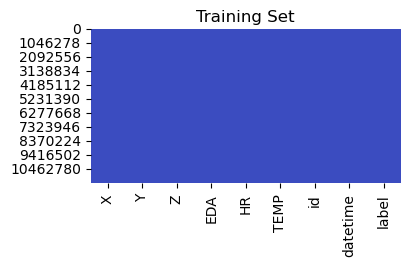

In [24]:
#Plot missing data using heatmap
plt.figure(figsize=(4, 2))
plt.title("Training Set")
sns.heatmap(data.isnull(), cbar=False, cmap="coolwarm")
plt.show()

In [25]:
data= data.drop(columns=['id'],axis=1)
data

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,2020-07-08 14:03:00.000000000,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,2020-07-08 14:03:00.031249920,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,2020-07-08 14:03:00.062500096,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,2020-07-08 14:03:00.093750016,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,2020-07-08 14:03:00.124999936,2.0
...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,2020-07-23 17:28:59.875000064,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,2020-07-23 17:28:59.906249984,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,2020-07-23 17:28:59.937499904,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,2020-07-23 17:28:59.968750080,2.0


In [26]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['datetime'] = le.fit_transform(data['datetime'])
data

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,5330929,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,5330930,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,5330931,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,5330932,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,5330933,2.0
...,...,...,...,...,...,...,...,...
11509046,-16.0,-56.0,24.0,3.386070,88.37,33.77,7337366,2.0
11509047,-8.0,-50.0,27.0,3.386070,88.37,33.77,7337367,2.0
11509048,-28.0,-36.0,28.0,3.386070,88.37,33.77,7337368,2.0
11509049,-29.0,-29.0,30.0,3.386070,88.37,33.77,7337369,2.0


In [27]:
# Drop duplicates
data = data.drop_duplicates()
print(data)

             X     Y     Z       EDA     HR   TEMP  datetime  label
0        -13.0 -61.0   5.0  6.769995  99.43  31.17   5330929    2.0
1        -20.0 -69.0  -3.0  6.769995  99.43  31.17   5330930    2.0
2        -31.0 -78.0 -15.0  6.769995  99.43  31.17   5330931    2.0
3        -47.0 -65.0 -38.0  6.769995  99.43  31.17   5330932    2.0
4        -67.0 -57.0 -53.0  6.769995  99.43  31.17   5330933    2.0
...        ...   ...   ...       ...    ...    ...       ...    ...
11509046 -16.0 -56.0  24.0  3.386070  88.37  33.77   7337366    2.0
11509047  -8.0 -50.0  27.0  3.386070  88.37  33.77   7337367    2.0
11509048 -28.0 -36.0  28.0  3.386070  88.37  33.77   7337368    2.0
11509049 -29.0 -29.0  30.0  3.386070  88.37  33.77   7337369    2.0
11509050 -22.0 -24.0  29.0  3.374543  88.33  33.75   7337370    2.0

[11403445 rows x 8 columns]


## Data Transformation

In [28]:
#calculates and prints the skewness and kurtosis
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime']

for col in columns:
    print(f"{col}")
    print(f"Skewness: {data[col].skew():.6f}")
    print(f"Kurtosis: {data[col].kurt():.6f}")
    print("-" * 30)

X
Skewness: 0.975403
Kurtosis: 0.875466
------------------------------
Y
Skewness: -0.210022
Kurtosis: -0.053596
------------------------------
Z
Skewness: -0.352655
Kurtosis: 0.252544
------------------------------
EDA
Skewness: 3.014666
Kurtosis: 12.053117
------------------------------
HR
Skewness: 0.926629
Kurtosis: 2.315441
------------------------------
TEMP
Skewness: -0.294793
Kurtosis: -1.077656
------------------------------
datetime
Skewness: 0.078894
Kurtosis: -1.186072
------------------------------


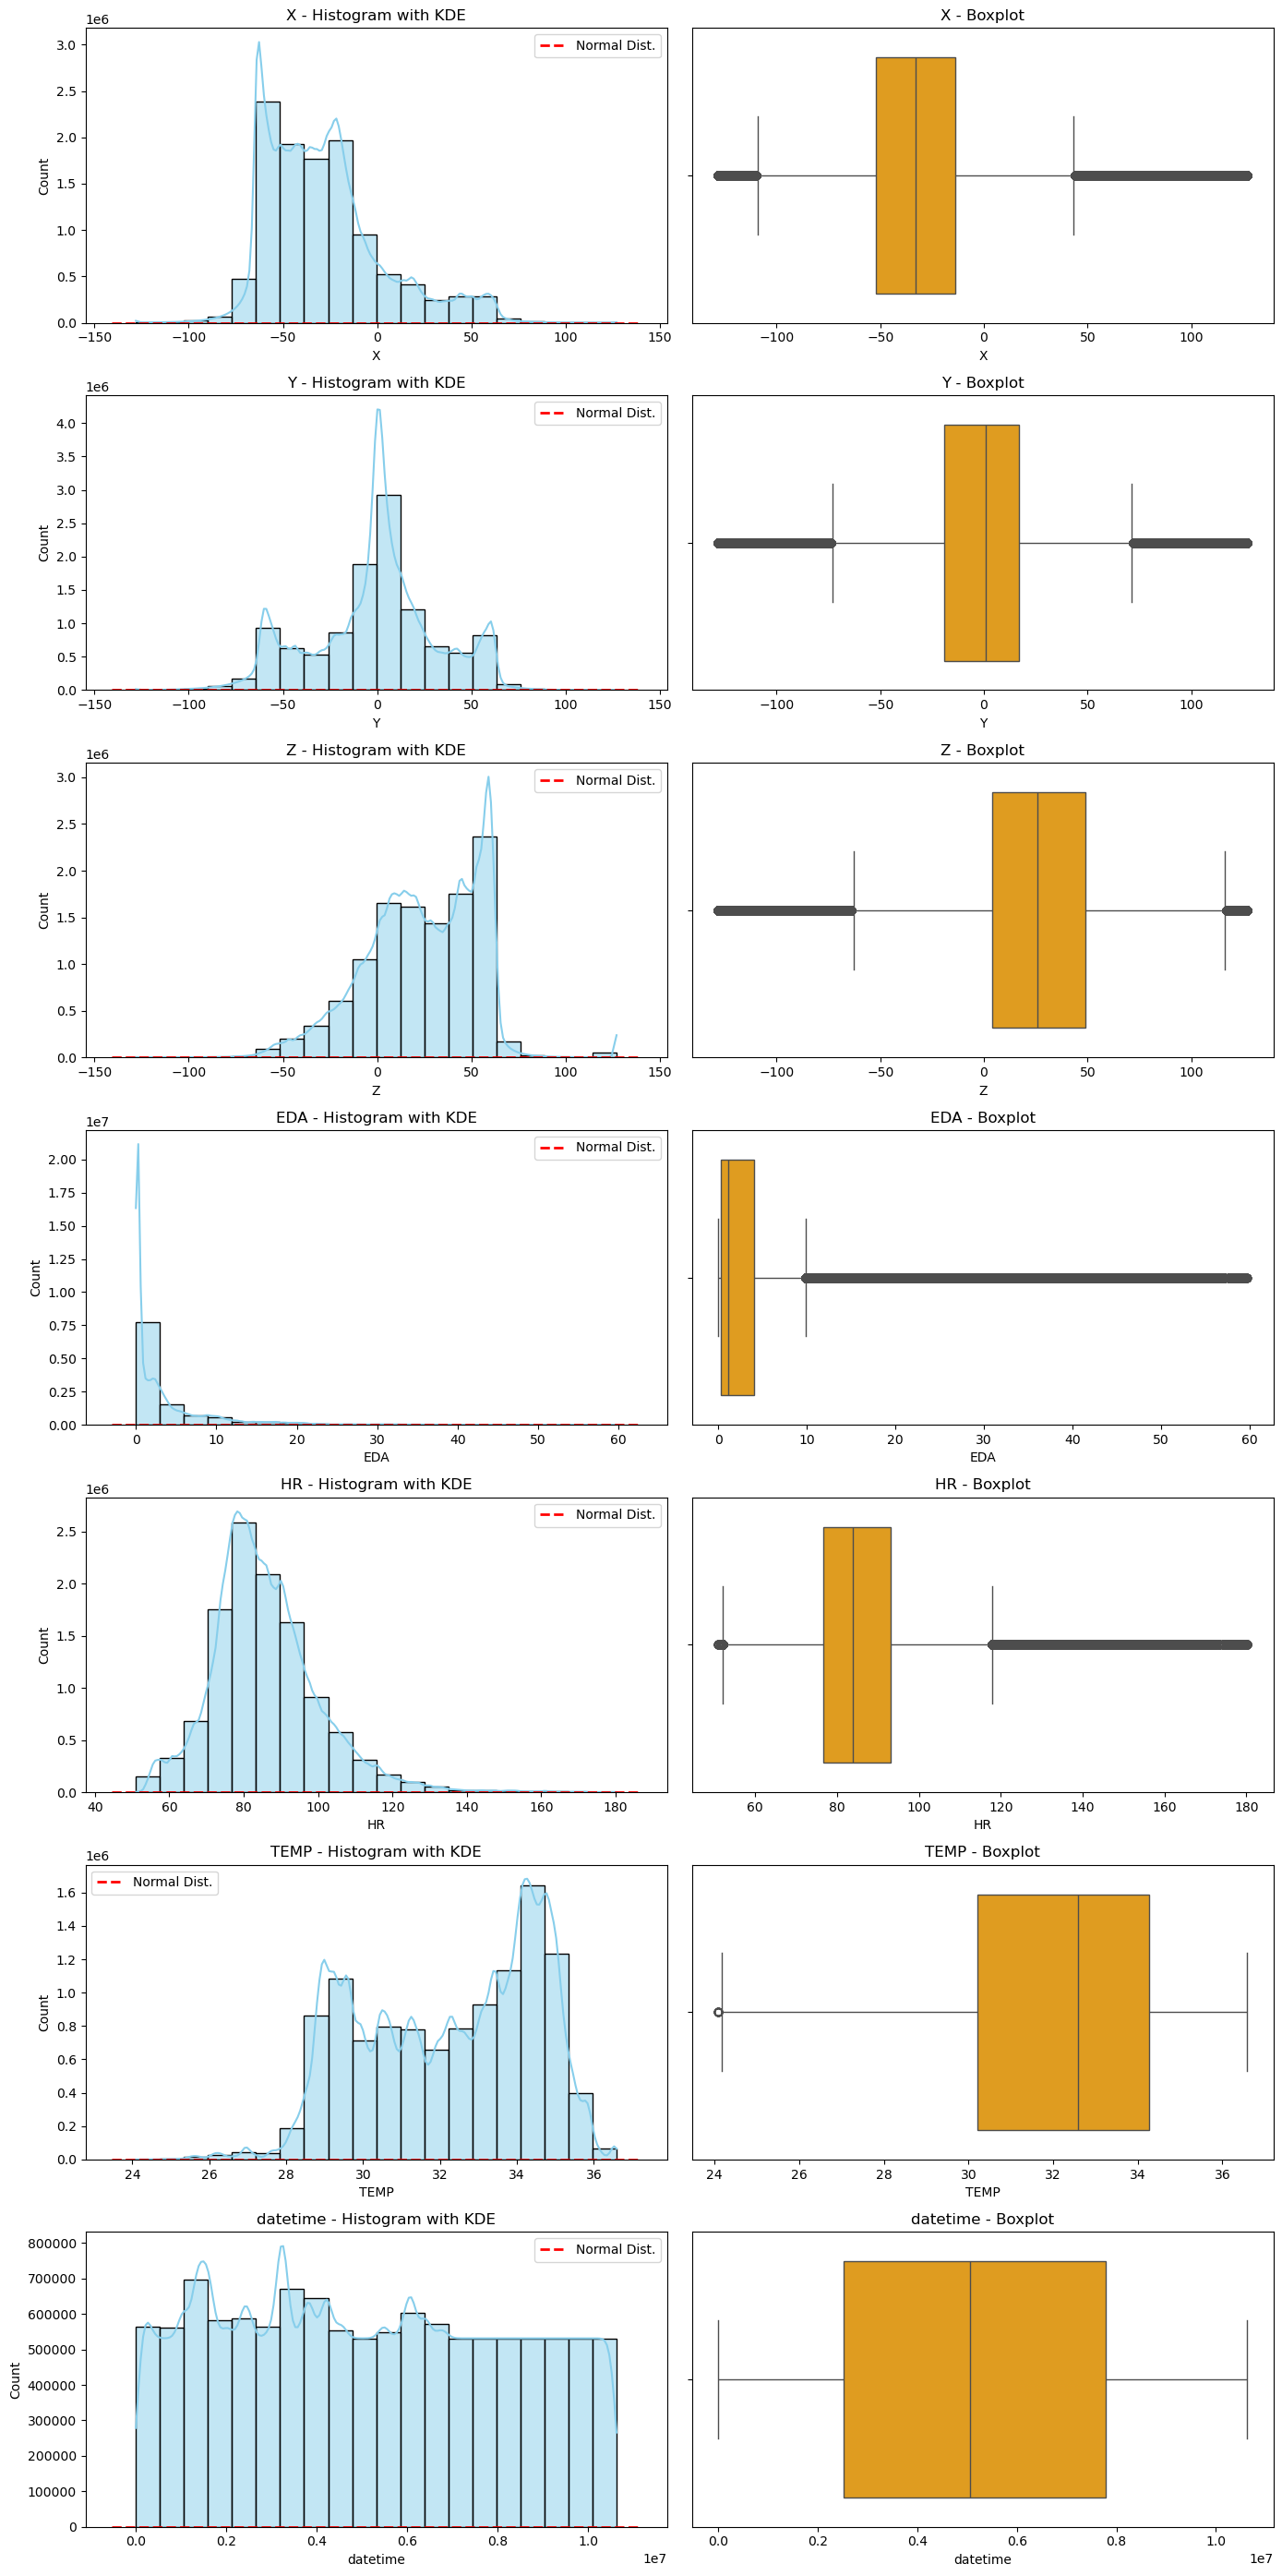

In [29]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats

# List of columns you want to visualize
columns = ['X', 'Y', 'Z', 'EDA', 'HR', 'TEMP', 'datetime']

# Create subplots - 2 rows (Histogram and Boxplot) for each feature
fig, axes = plt.subplots(len(columns), 2, figsize=(14, len(columns) * 4))

# Loop through each column
for i, col in enumerate(columns):
    # Plot histogram with KDE for skewness
    sns.histplot(data[col], kde=True, color='skyblue', ax=axes[i, 0], bins=20)
    axes[i, 0].set_title(f'{col} - Histogram with KDE', fontsize=12)
    axes[i, 0].set_xlabel(f'{col}')

    # Overlay a normal distribution
    mean, std = data[col].mean(), data[col].std()
    xmin, xmax = axes[i, 0].get_xlim()
    x = np.linspace(xmin, xmax, 100)
    p = stats.norm.pdf(x, mean, std)
    axes[i, 0].plot(x, p, 'r--', label='Normal Dist.', lw=2)
    axes[i, 0].legend()

    # Plot boxplot for visualizing kurtosis
    sns.boxplot(x=data[col], ax=axes[i, 1], color='orange')
    axes[i, 1].set_title(f'{col} - Boxplot', fontsize=12)
    axes[i, 1].set_xlabel(f'{col}')

# Adjust layout
plt.tight_layout()
plt.show()

In [30]:
data.head()

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,6.769995,99.43,31.17,5330929,2.0
1,-20.0,-69.0,-3.0,6.769995,99.43,31.17,5330930,2.0
2,-31.0,-78.0,-15.0,6.769995,99.43,31.17,5330931,2.0
3,-47.0,-65.0,-38.0,6.769995,99.43,31.17,5330932,2.0
4,-67.0,-57.0,-53.0,6.769995,99.43,31.17,5330933,2.0


In [31]:
#calculating the skewness and kurtosis before and after applying a transformation to the 'EDA' column.
#using cube root transformation (train['EDA'] = train['EDA']**(1/3)) to reduce skewness
import scipy.stats as stats

# Original EDA skewness and kurtosis
print("EDA Original value")
print("Skewness: %f" % data['EDA'].skew())
print("Kurtosis: %f" % data['EDA'].kurt())

# Apply cube root transformation to EDA to reduce skewness
print("\nEDA Adjusted value (Cube Root Transformation)")
data['EDA'] = data['EDA']**(1/3)
print('Skewness: %f' % stats.skew(data['EDA'], bias=False))
print('Kurtosis: %f' % stats.kurtosis(data['EDA'], bias=False, fisher=True))

#Positive skewness: Indicates a right-skewed distribution (long tail on the right).
#Negative skewness: Indicates a left-skewed distribution (long tail on the left).
#Kurtosis: Values near 0 (when fisher=True) indicate a normal-like distribution;
#positive values mean a more peaked distribution, while negative values indicate a flatter distribution.

EDA Original value
Skewness: 3.014666
Kurtosis: 12.053117

EDA Adjusted value (Cube Root Transformation)
Skewness: 0.819291
Kurtosis: -0.019175


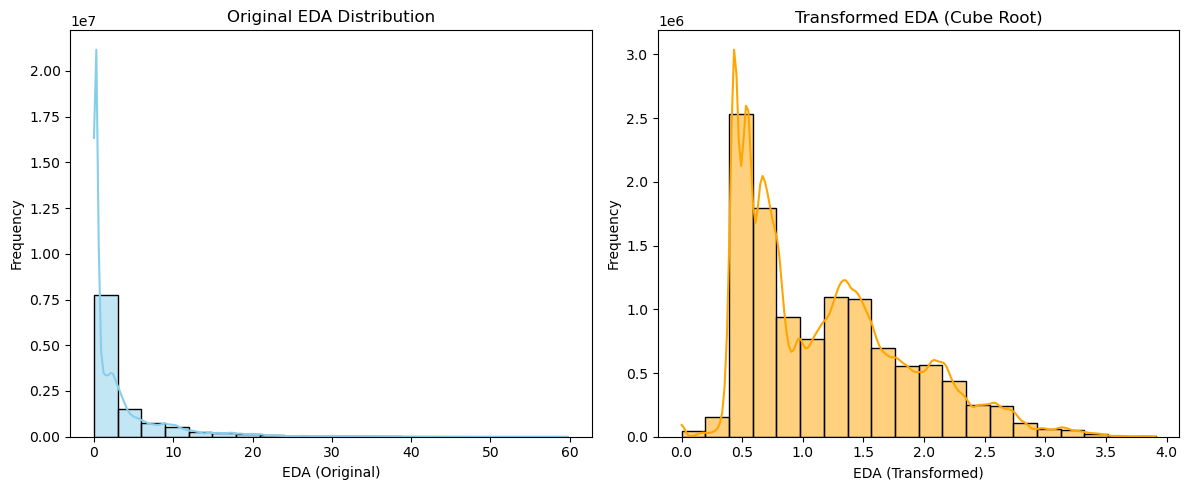

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the original and transformed EDA distribution side by side
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Original EDA distribution
sns.histplot(data['EDA']**3, kde=True, color='skyblue', ax=axes[0], bins=20)
axes[0].set_title('Original EDA Distribution')
axes[0].set_xlabel('EDA (Original)')
axes[0].set_ylabel('Frequency')

# Transformed EDA distribution (Cube Root)
sns.histplot(data['EDA'], kde=True, color='orange', ax=axes[1], bins=20)
axes[1].set_title('Transformed EDA (Cube Root)')
axes[1].set_xlabel('EDA (Transformed)')
axes[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

#Left Plot: The first subplot shows the distribution of the original EDA values.
#Right Plot: The second subplot shows the distribution after applying the cube root transformation.
#KDE Overlay: Kernel Density Estimation (KDE) is added to smooth the histogram and help visualize the overall shape of the distribution.

# Feature Selection



[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.108849 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1610
[LightGBM] [Info] Number of data points in the train set: 11403445, number of used features: 7
[LightGBM] [Info] Start training from score -1.662768
[LightGBM] [Info] Start training from score -2.690640
[LightGBM] [Info] Start training from score -0.297666


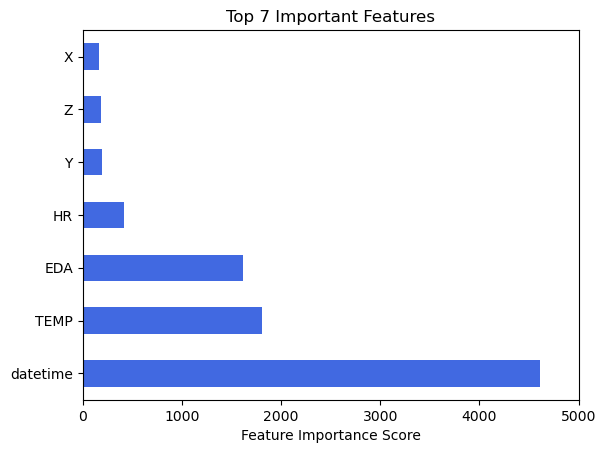

datetime    4613
TEMP        1809
EDA         1617
HR           418
Y            192
Z            187
X            164
dtype: int32


In [33]:
import pandas as pd
import lightgbm as lgb
import matplotlib.pyplot as plt

# Separating features and target
X_data_feature = data.drop(columns=['label'], axis=1)  # Feature set
y_data_feature = data['label']  # Target/Label set

# Initialize the LightGBM classifier
model = lgb.LGBMClassifier()

# Train the model
model.fit(X_data_feature, y_data_feature)

# Get feature importances
feat_importances = pd.Series(model.feature_importances_, index=X_data_feature.columns)

# Plot the top 7 important features
top_n = 7
feat_importances.nlargest(top_n).plot(kind='barh', color='royalblue')
plt.title(f'Top {top_n} Important Features')
plt.xlabel('Feature Importance Score')
plt.xlim(0, 5000)  # Adjust the x-axis limits if needed
plt.show()

# Print feature importances (Optional)
print(feat_importances.nlargest(top_n))


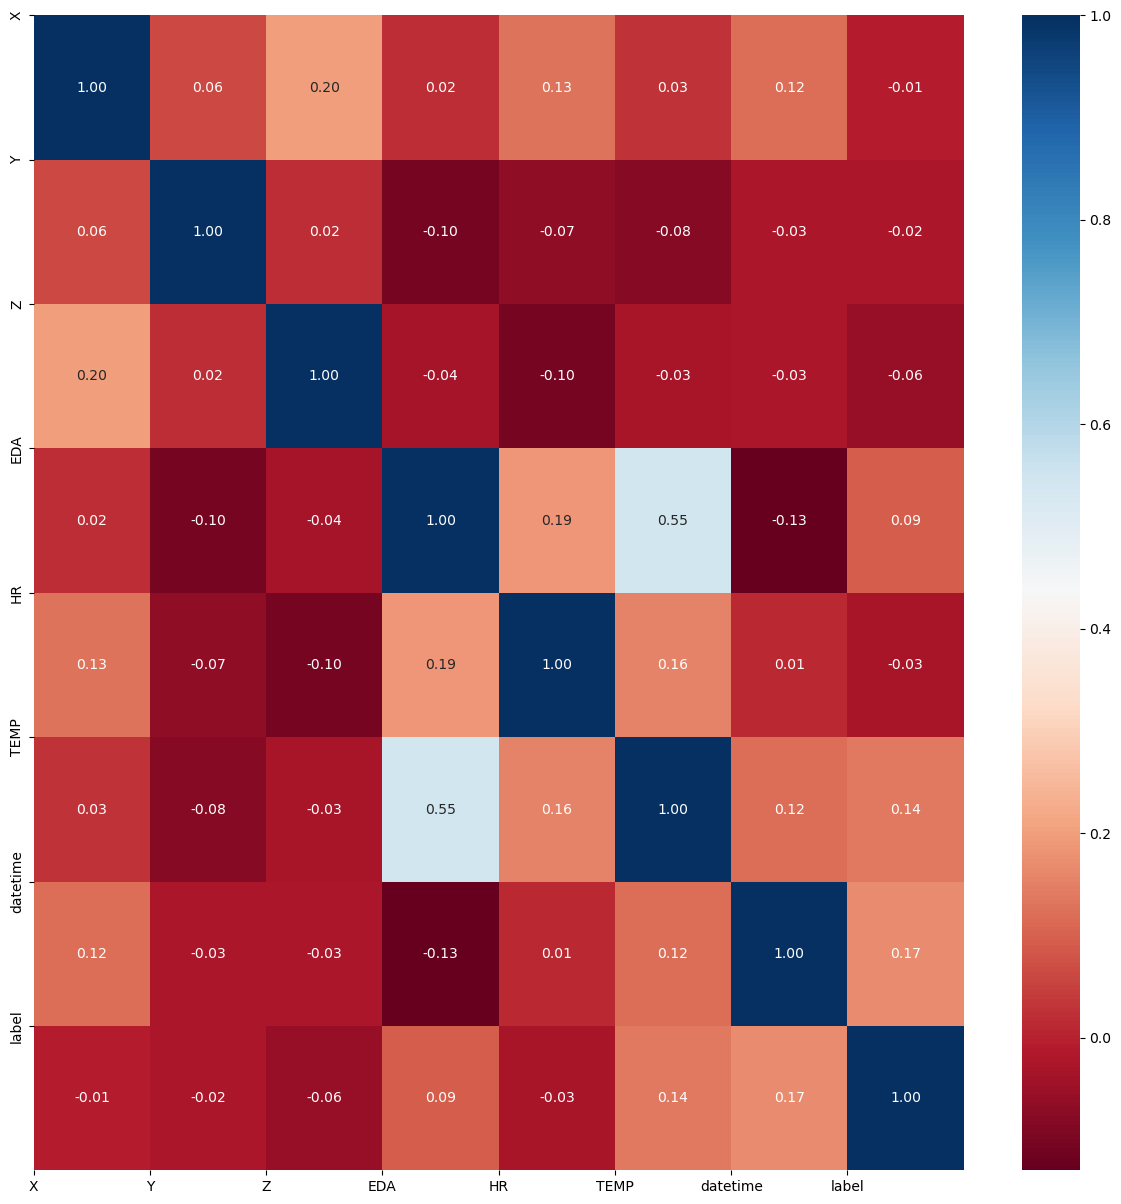

In [34]:
#heatmap showing the Pearson correlation coefficients
import matplotlib.pyplot as plt
import seaborn as sns
corr = data.corr(method='pearson')
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, cmap='RdBu', annot=True, fmt=".2f")
plt.xticks(range(len(corr.columns)), corr.columns);
plt.yticks(range(len(corr.columns)), corr.columns)
plt.show()

In [35]:
X = data.drop(columns=['label', 'datetime'], axis=1)
y = data['label']

In [36]:
data.head(-10)

,X,Y,Z,EDA,HR,TEMP,datetime,label
0,-13.0,-61.0,5.0,1.891746,99.43,31.17,5330929,2.0
1,-20.0,-69.0,-3.0,1.891746,99.43,31.17,5330930,2.0
2,-31.0,-78.0,-15.0,1.891746,99.43,31.17,5330931,2.0
3,-47.0,-65.0,-38.0,1.891746,99.43,31.17,5330932,2.0
4,-67.0,-57.0,-53.0,1.891746,99.43,31.17,5330933,2.0
...,...,...,...,...,...,...,...,...
11509036,-30.0,-36.0,30.0,1.503529,88.37,33.77,7337356,2.0
11509037,-28.0,-36.0,26.0,1.503529,88.37,33.77,7337357,2.0
11509038,-39.0,-32.0,19.0,1.503529,88.37,33.77,7337358,2.0
11509039,-26.0,-26.0,28.0,1.503529,88.37,33.77,7337359,2.0


## Feature Scaling

In [37]:
#feature scaling
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assigning X and y
X_train = X
y_train = y

# Initialize the scaler
scaler = MinMaxScaler()

# Fit and transform the training data (X)
X_train_scaled = scaler.fit_transform(X_train)

# Convert back to a DataFrame and preserve column names
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)

# Display the scaled DataFrame
X_train_scaled

,X,Y,Z,EDA,HR,TEMP
0,0.450980,0.262745,0.521569,0.483865,0.374758,0.5664
1,0.423529,0.231373,0.490196,0.483865,0.374758,0.5664
2,0.380392,0.196078,0.443137,0.483865,0.374758,0.5664
3,0.317647,0.247059,0.352941,0.483865,0.374758,0.5664
4,0.239216,0.278431,0.294118,0.483865,0.374758,0.5664
...,...,...,...,...,...,...
11403440,0.439216,0.282353,0.596078,0.384084,0.289174,0.7744
11403441,0.470588,0.305882,0.607843,0.384084,0.289174,0.7744
11403442,0.392157,0.360784,0.611765,0.384084,0.289174,0.7744
11403443,0.388235,0.388235,0.619608,0.384084,0.289174,0.7744


# Visualization of Scaled Data

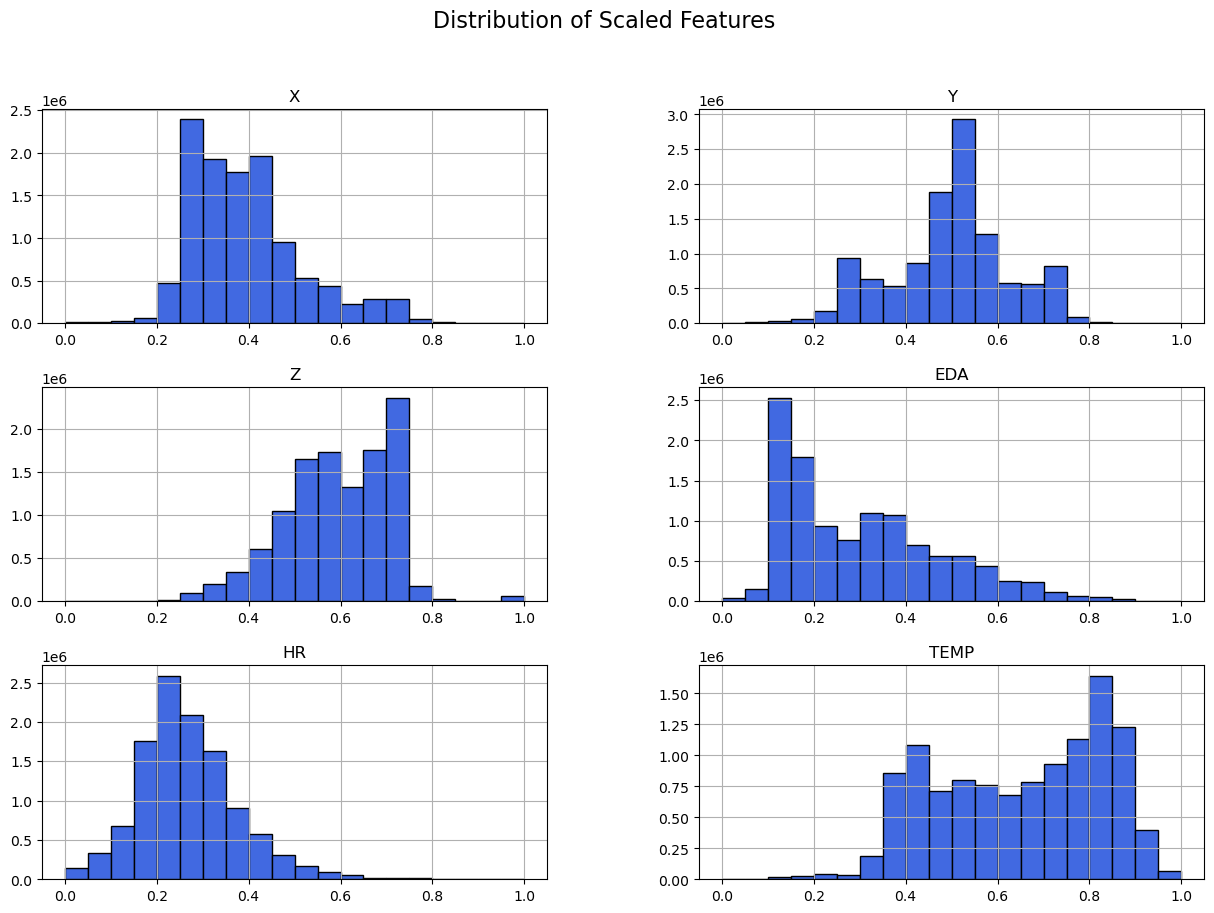

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot histograms for each scaled feature
X_train_scaled.hist(bins=20, figsize=(15, 10), color='royalblue', edgecolor='black')
plt.suptitle('Distribution of Scaled Features', fontsize=16)
plt.show()

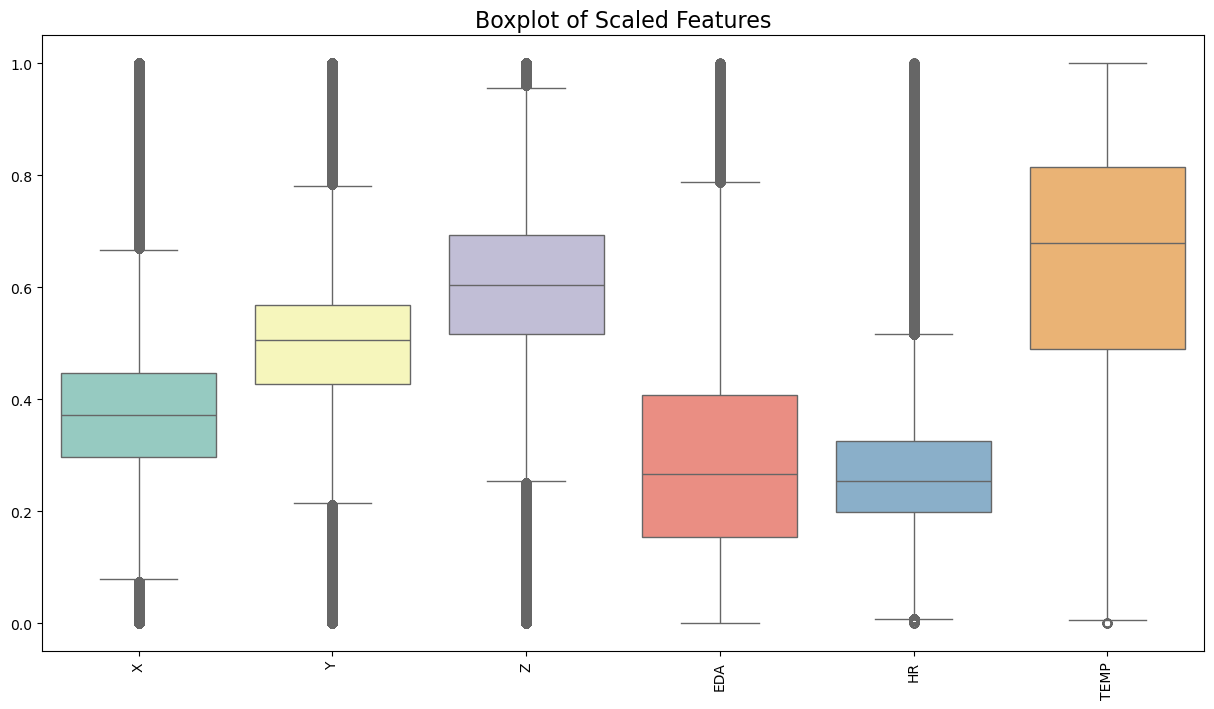

In [39]:
plt.figure(figsize=(15, 8))
sns.boxplot(data=X_train_scaled, palette='Set3')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility if feature names are long
plt.title('Boxplot of Scaled Features', fontsize=16)
plt.show()

# Train Test Split

In [40]:
X_train, X_eval, y_train, y_eval = train_test_split(X_train, y_train,test_size=0.2,random_state=2019)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_eval: ", X_eval.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_eval",y_eval.shape)

Shape of X_train:  (9122756, 6)
Shape of X_eval:  (2280689, 6)
Shape of y_train:  (9122756,)
Shape of y_eval (2280689,)


## Principal Component Analysis

In [41]:
#import PCA libraries
from sklearn.decomposition import PCA, IncrementalPCA
from sklearn.preprocessing import StandardScaler #Fixed typo here

#fitting PCA
pca = PCA(n_components=5).fit(X_train)

#Explained Variance Code
exp = pca.explained_variance_ratio_
print(exp)

[0.37050604 0.33126812 0.2364724  0.06006755 0.00159038]


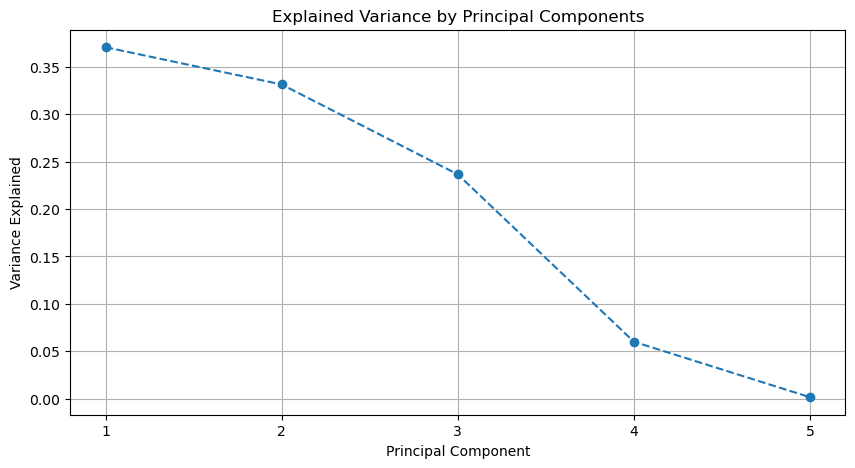

In [42]:
#visualize the explained variance by principal components
plt.figure(figsize=(10, 5))
plt.plot(range(1, len(exp) + 1), exp, marker='o', linestyle='--')
plt.title('Explained Variance by Principal Components')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.xticks(range(1, len(exp) + 1))
plt.grid()
plt.show()
#X-axis (Principal Component): Shows each principal component in order of how much variance they capture.
#Y-axis (Variance Explained): Represents the proportion of variance that each principal component explains in the dataset.
#Line and markers: Indicate the variance explained by each successive component.

In [43]:
#(IncrementalPCA) to reduce the dimensionality of both X_train and X_eval datasets
#IncrementalPCA(n_components=5): This specifies that you want to reduce the number of features down to 5 principal components using Incremental PCA, 
#which is useful for large datasets as it processes data in mini-batches rather than loading the entire dataset into memory at once.
#fit_transform(X_train): Fits the PCA model to X_train and transforms the data into the new feature space with 5 components.

#Applying IncrementalPCA to X_train:
X_train_pca = IncrementalPCA(n_components=5).fit_transform(X_train)

#Applying IncrementalPCA to X_eval:
X_eval_pca = IncrementalPCA(n_components=5).fit_transform(X_eval)

#Updating X_train and X_eval with PCA-transformed Data:
X_train = X_train_pca
X_eval = X_eval_pca

#Display the transformed data:
display(X_train)
display(X_eval)

#Both X_train and X_eval will now be matrices with 5 columns, each representing one of the principal components. 
#If X_train originally had m samples, the resulting X_train will have shape (m, 5). 
#Similarly, X_eval will have the shape (n, 5) where n is the number of evaluation samples.
#IncrementalPCA is particularly useful when:
#1.The dataset is too large to fit into memory all at once.
#2.You want to perform PCA in mini-batches while maintaining performance similar to standard PCA.

array([[-25.59940974,  -1.24410762, -31.0888639 ,  34.74211871,
          0.81867823],
       [ -1.00417262, -31.74449811,  19.36557959,  -5.35978249,
         -3.17705824],
       [  2.94497312,  -7.2324359 ,  27.30883973,   3.58381046,
          1.04725195],
       ...,
       [ 57.00626535, -40.98324261, -43.82077491,  48.58994671,
         -1.04176531],
       [-37.0921153 , -44.39188455, -17.36262458,  -5.58603093,
          2.5025859 ],
       [-31.60543949,  41.04744817,  -8.54604181,  -4.98877486,
          3.3585603 ]])

array([[ 57.55929399,  28.8391789 ,  -4.53101546,   8.75511853,
          3.07466708],
       [ 59.69295551, -57.59752973, -17.44521706,  -8.26972687,
          2.4946601 ],
       [-11.09798545,  12.27912172,  21.39614671,  40.9462675 ,
         -0.30482108],
       ...,
       [ 17.07190094, -25.22611913,  23.87734209,  -0.98927762,
          0.17901191],
       [-52.27493845,  18.83202169, -40.73104219, -33.55616805,
         -2.21622285],
       [ 23.91359588, -24.91197825,  23.14157613, -15.81388558,
         -2.81384691]])

In [44]:
print(X_train.shape)
print(X_eval.shape)

(9122756, 5)
(2280689, 5)


## Training Models

In [45]:
# Initialize and train XGB Classifier
XGB = XGBClassifier(objective='multi:softmax')
XGB.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, objective='multi:softmax', ...)

In [46]:
# Initialize and train LGBM Classifier
LGBM = LGBMClassifier(objective='multiclass')
LGBM.fit(X_train, y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.164918 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1275
[LightGBM] [Info] Number of data points in the train set: 9122756, number of used features: 5
[LightGBM] [Info] Start training from score -1.662808
[LightGBM] [Info] Start training from score -2.689850
[LightGBM] [Info] Start training from score -0.297728


LGBMClassifier(objective='multiclass')

## Model Evaluation

LGBM Accuracy: 80.957%
Confusion Matrix:
 [[ 139145    3039  290333]
 [   7723   41300  105204]
 [  24704    3309 1665932]]


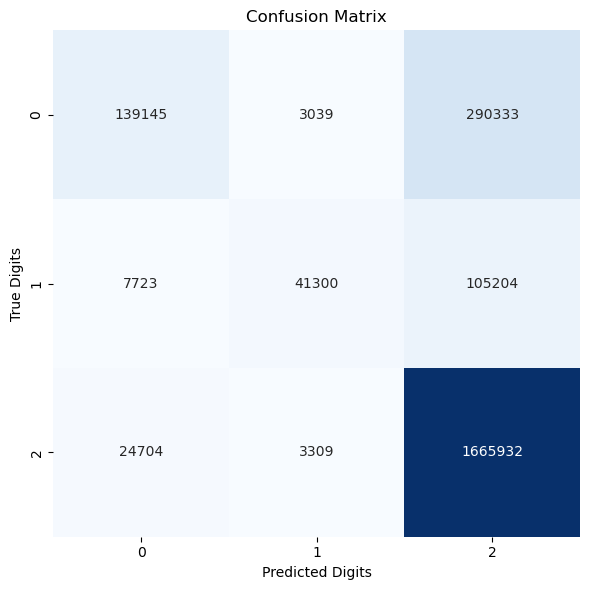

In [47]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions
y_pred_LGBM = LGBM.predict(X_eval)

# Accuracy score
LGBM_acc = accuracy_score(y_eval, y_pred_LGBM)
print(f"LGBM Accuracy: {LGBM_acc * 100:.3f}%")

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred_LGBM)

# Debug: Check the confusion matrix contents
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))  # Increase size for better readability
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=False)

plt.xlabel("Predicted Digits")
plt.ylabel("True Digits")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

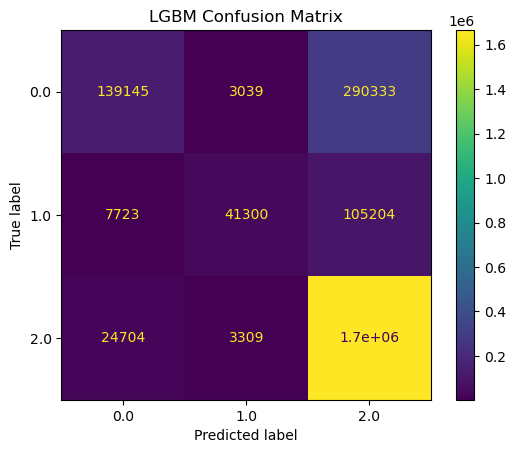

In [48]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Confusion Matrix for Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_LGBM)
plt.title('LGBM Confusion Matrix')
plt.show()

XGB Accuracy: 82.844%
Confusion Matrix:
 [[ 173645    4061  254811]
 [   6879   59327   88021]
 [  31043    6459 1656443]]


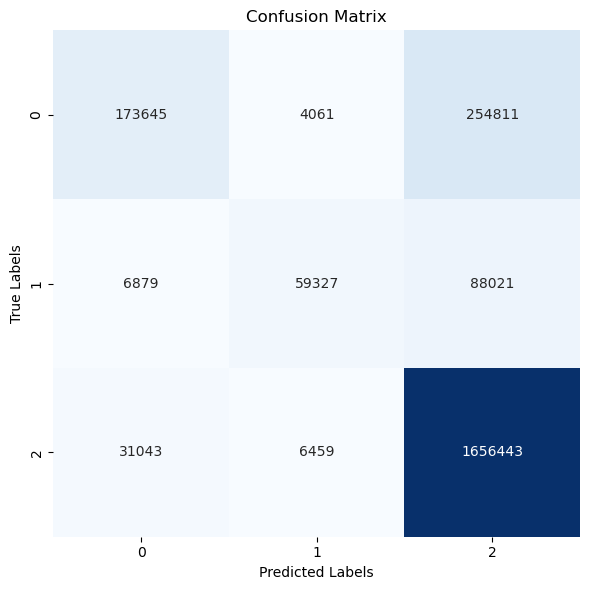

In [49]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, confusion_matrix

# Predictions using XGBoost model
y_pred_XGB = XGB.predict(X_eval)

# Calculate accuracy
XGB_acc = accuracy_score(y_eval, y_pred_XGB)
print(f"XGB Accuracy: {XGB_acc * 100:.3f}%")

# Confusion Matrix
cm = confusion_matrix(y_eval, y_pred_XGB)

# Debug: Print confusion matrix values
print("Confusion Matrix:\n", cm)

# Plot Confusion Matrix
plt.figure(figsize=(6, 6))  # Slightly larger plot for better readability
sns.heatmap(cm, annot=True, fmt='.0f', cmap='Blues', cbar=False)

# Set labels and title
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.title("Confusion Matrix")
plt.tight_layout()
plt.show()

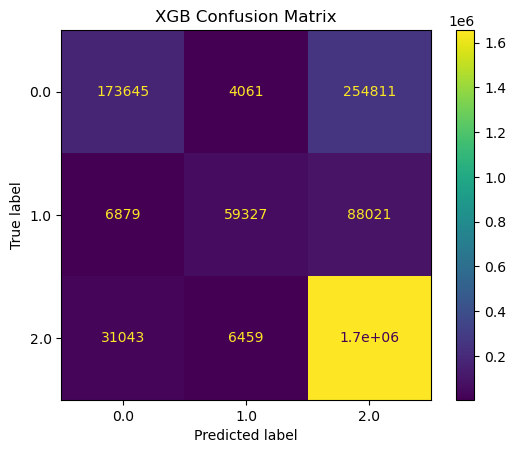

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Predictions for XGBoost model
y_pred_XGB = XGB.predict(X_eval)

# Display confusion matrix for XGBoost model
ConfusionMatrixDisplay.from_predictions(y_eval, y_pred_XGB)
plt.title('XGB Confusion Matrix')
plt.show()

In [51]:
import pandas as pd

# Create a list of tuples with model names and their accuracy scores
models = [('LGBMClassifier', LGBM_acc),
          ('XGBClassifier', XGB_acc)
         ]                                           

# Convert the list into a DataFrame
predict = pd.DataFrame(data=models, columns=['Model', 'Accuracy'])

# Display the DataFrame
print(predict)

            Model  Accuracy
0  LGBMClassifier   0.80957
1   XGBClassifier   0.82844


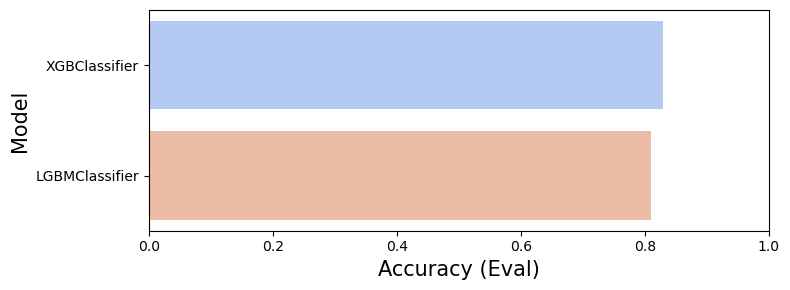

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create figure and axis
f, axe = plt.subplots(1, 1, figsize=(8, 3))  # Adjusted height for better readability

# Sort models by accuracy
predict.sort_values(by=['Accuracy'], ascending=False, inplace=True)

# Plotting a horizontal bar chart
sns.barplot(x='Accuracy', y='Model', data=predict, ax=axe, palette='coolwarm')

# Set axis labels
axe.set_xlabel('Accuracy (Eval)', fontsize=15)
axe.set_ylabel('Model', fontsize=15)

# Set limits for accuracy (assuming accuracy is between 0 and 1)
axe.set_xlim(0, 1.0)

# Show plot
plt.tight_layout()  # Ensures no overlap
plt.show()

In [53]:
!pip install --upgrade tensorflow

In [54]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Data Preprocessing (if needed, e.g., scaling)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_data_feature)

# Split the data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_scaled, y_data_feature, test_size=0.2, random_state=42)

# Build the TensorFlow model
model = Sequential()

# Add input layer and first hidden layer (with 64 neurons and ReLU activation)
model.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))

# Add second hidden layer (with 32 neurons and ReLU activation)
model.add(Dense(32, activation='relu'))

# Output layer (for binary classification, use 1 neuron with sigmoid activation)
model.add(Dense(1, activation='sigmoid'))

# Compile the model with optimizer, loss function, and evaluation metric
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Compile for multiclass classification
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Print a summary of the model
model.summary()

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Evaluate the model on the validation set
val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f"Validation Accuracy: {val_accuracy * 100:.2f}%")

# Making predictions
y_pred = model.predict(X_val)
y_pred = (y_pred > 0.5).astype(int)  # Convert probabilities to binary predictions


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 64)                  │             512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,625 (10.25 KB)

 Trainable params: 2,625 (10.25 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10


InvalidArgumentError: Graph execution error:

Detected at node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits defined at (most recent call last):
  File "<frozen runpy>", line 198, in _run_module_as_main

  File "<frozen runpy>", line 88, in _run_code

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel_launcher.py", line 17, in <module>

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\traitlets\config\application.py", line 992, in launch_instance

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\kernelapp.py", line 701, in start

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\tornado\platform\asyncio.py", line 195, in start

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\asyncio\windows_events.py", line 321, in run_forever

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\asyncio\base_events.py", line 607, in run_forever

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\asyncio\base_events.py", line 1922, in _run_once

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\asyncio\events.py", line 80, in _run

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\kernelbase.py", line 534, in dispatch_queue

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\kernelbase.py", line 523, in process_one

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\kernelbase.py", line 429, in dispatch_shell

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\kernelbase.py", line 767, in execute_request

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\ipkernel.py", line 429, in do_execute

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\ipykernel\zmqshell.py", line 549, in run_cell

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\interactiveshell.py", line 3051, in run_cell

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\interactiveshell.py", line 3106, in _run_cell

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\async_helpers.py", line 129, in _pseudo_sync_runner

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\interactiveshell.py", line 3311, in run_cell_async

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\interactiveshell.py", line 3493, in run_ast_nodes

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\IPython\core\interactiveshell.py", line 3553, in run_code

  File "C:\Users\singh\AppData\Local\Temp\ipykernel_1204\915299230.py", line 37, in <module>

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\utils\traceback_utils.py", line 117, in error_handler

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 320, in fit

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 121, in one_step_on_iterator

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 108, in one_step_on_data

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\backend\tensorflow\trainer.py", line 54, in train_step

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\trainers\trainer.py", line 359, in _compute_loss

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\trainers\trainer.py", line 327, in compute_loss

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\trainers\compile_utils.py", line 611, in __call__

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\trainers\compile_utils.py", line 652, in call

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\losses\loss.py", line 60, in __call__

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\losses\losses.py", line 27, in call

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\losses\losses.py", line 1870, in sparse_categorical_crossentropy

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\ops\nn.py", line 1559, in sparse_categorical_crossentropy

  File "C:\Users\singh\.anaconda\Anacondaa\Lib\site-packages\keras\src\backend\tensorflow\nn.py", line 671, in sparse_categorical_crossentropy

Received a label value of 2 which is outside the valid range of [0, 1).  Label values: 2 2 2 0 2 2 2 0 0 2 0 2 2 2 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 0 0 2
	 [[{{node compile_loss/sparse_categorical_crossentropy/SparseSoftmaxCrossEntropyWithLogits/SparseSoftmaxCrossEntropyWithLogits}}]] [Op:__inference_one_step_on_iterator_1271]

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from xgboost import XGBClassifier
import lightgbm as lgb
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate model
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    return accuracy, conf_matrix, class_report

# 1. XGBoost Classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb_accuracy, xgb_conf_matrix, xgb_class_report = evaluate_model(xgb_model, X_train, X_test, y_train, y_test)

# 2. LightGBM Classifier
lgb_model = lgb.LGBMClassifier()
lgb_accuracy, lgb_conf_matrix, lgb_class_report = evaluate_model(lgb_model, X_train, X_test, y_train, y_test)

# 3. TensorFlow Model
def create_tf_model():
    model = keras.Sequential([
        layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(np.unique(y)), activation='softmax')  # For multi-class classification
    ])
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    return model

tf_model = create_tf_model()
tf_model.fit(X_train, y_train, epochs=50, batch_size=8, verbose=0)  # Adjust epochs/batch size as needed
y_pred_tf = np.argmax(tf_model.predict(X_test), axis=-1)

# Calculate TensorFlow model metrics
tf_accuracy = accuracy_score(y_test, y_pred_tf)
tf_conf_matrix = confusion_matrix(y_test, y_pred_tf)
tf_class_report = classification_report(y_test, y_pred_tf)

# Print Results
models = ['XGBoost', 'LightGBM', 'TensorFlow']
accuracies = [xgb_accuracy, lgb_accuracy, tf_accuracy]
conf_matrices = [xgb_conf_matrix, lgb_conf_matrix, tf_conf_matrix]
class_reports = [xgb_class_report, lgb_class_report, tf_class_report]

for model, accuracy, conf_matrix, class_report in zip(models, accuracies, conf_matrices, class_reports):
    print(f"Model: {model}")
    print(f"Accuracy: {accuracy:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)
    print("-" * 60)

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBClassifier

# Define the model
xgb = XGBClassifier()

# Define the hyperparameters grid
param_grid_xgb = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
random_search_xgb = RandomizedSearchCV(xgb, param_grid_xgb, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Perform cross-validation and hyperparameter tuning
random_search_xgb.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for XGB: ", random_search_xgb.best_params_)

# Best score
print("Best Cross-Validated Accuracy for XGB: ", random_search_xgb.best_score_)

In [ ]:
from lightgbm import LGBMClassifier

# Define the model
lgbm = LGBMClassifier()

# Define the hyperparameters grid
param_grid_lgbm = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'num_leaves': [31, 40, 50],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Set up RandomizedSearchCV
random_search_lgbm = RandomizedSearchCV(lgbm, param_grid_lgbm, cv=5, scoring='accuracy', n_iter=10, random_state=42)

# Perform cross-validation and hyperparameter tuning
random_search_lgbm.fit(X_train, y_train)

# Best hyperparameters
print("Best Hyperparameters for LGBM: ", random_search_lgbm.best_params_)

# Best score
print("Best Cross-Validated Accuracy for LGBM: ", random_search_lgbm.best_score_)

In [ ]:
!pip install keras-tuner --upgrade

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from kerastuner.tuners import RandomSearch

# Define the model with hyperparameters for tuning
def build_model(hp):
    model = Sequential()
    
    # Tune the number of units in the first Dense layer
    model.add(Dense(units=hp.Int('units', min_value=32, max_value=512, step=32), activation='relu', input_shape=(X_train.shape[1],)))
    
    # Tune number of hidden layers and units in each hidden layer
    for i in range(hp.Int('num_layers', 1, 3)):  # Allows 1 to 3 hidden layers
        model.add(Dense(units=hp.Int(f'layer_{i}_units', min_value=32, max_value=512, step=32), activation='relu'))
    
    # Output layer for binary classification
    model.add(Dense(1, activation='sigmoid'))
    
    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
    return model

# Set up Keras Tuner's RandomSearch
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=5, executions_per_trial=3, directory='tuner_results', project_name='tensorflow_tuning')

# Perform the search
tuner.search(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

# Get the best model and hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
best_model = tuner.get_best_models(num_models=1)[0]

# Print best hyperparameters
print(f"Best hyperparameters: {best_hps.values}")

In [ ]:
import pickle  # Import the pickle module
# Save the model to a file
with open("Downloads", "wb") as file:
    pickle.dump(model, file)

# Later, load the model from the file
with open("path/to/tokeniser.p", "rb") as file:
    loaded_model = pickle.load(file)

In [ ]:
# Now, you can use 'loaded_model' to make predictions or evaluate the model
# Example prediction
y_pred = loaded_model.predict(X_test)  # Replace X_test with your test data